In [1]:
import cv2
import torch, random, sklearn
import numpy as np
from torch import nn, optim
from sklearn.datasets import load_iris, load_digits, load_breast_cancer, load_wine
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from torch.nn import ModuleList, functional as F
from matplotlib import pyplot as plt
from tqdm.notebook import tqdm_notebook
from tqdm.auto import tqdm
import json, pickle
from collections import deque
from ultralytics import YOLO
from torch.autograd import Variable 
from matplotlib import pyplot as plt
import torch.utils.data as Data
import pandas as pd
from datapre import *
from lstm import LSTM

In [2]:
with open("data.dat", 'rb') as f:
    X, y = pickle.load(f)
NX, ny = [], []
for i, j in zip(X, y):
    if j != 6:
        NX.append(i)
        ny.append(j)
# for i in X:
#     print(len(i))
X, y = process(NX, ny)
X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train)


In [3]:
dist = (len(y)/y.sum(dim=0))**1.1
dist

tensor([14.0290,  4.4717, 11.0594,  3.8479,  5.9757, 26.9857])

  0%|          | 0/1000 [00:00<?, ?it/s]

tensor([34.5049, 33.2838, 46.2258, 12.4009, 33.8053, 19.7792], grad_fn=<SumBackward1>)
tensor([39.3826, 11.6242, 28.7823, 53.7670, 17.4623, 28.9816], grad_fn=<SumBackward1>)
tensor([ 7.0920,  2.5116, 22.7977, 96.2200, 24.9194, 26.4593], grad_fn=<SumBackward1>)
tensor([ 6.4338,  2.5784, 46.2099, 70.1736, 33.6509, 20.9534], grad_fn=<SumBackward1>)
tensor([ 5.1243,  2.1153, 47.6272, 69.1271, 34.3025, 21.7035], grad_fn=<SumBackward1>)
tensor([ 4.7037,  2.2081, 48.1443, 69.1934, 34.6466, 21.1040], grad_fn=<SumBackward1>)
tensor([ 4.4512,  9.2365, 35.4641, 77.3306, 33.4881, 20.0296], grad_fn=<SumBackward1>)
Stopped at Epoch 330
Loss: 10.214730262756348


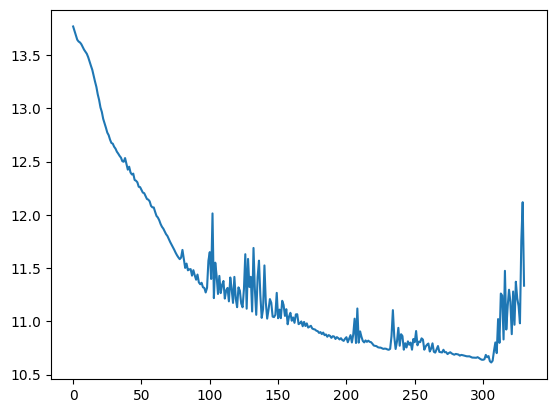

In [7]:
lstm = LSTM(6, 24, 80, 3, [30, 30, 30, 30, 30], look_back//skip+1, dist)
lstm.train(1000, X_train, y_train, X_val, y_val)

In [10]:
total, count = 0, 0
pred = lstm(X_test)
counts = [0]*7
for x, yi in enumerate(y_test):
    y_p, y_t = pred[x].argmax(), yi.argmax()
    counts[y_p]+=1
    # print(y_p, y_t, pred[x], yi)
    count += y_p==y_t
    total+=1
print(count/total)
print(counts)
print(pred.sum(dim=0))
print(y.sum(dim=0))

tensor(0.5250)
[2, 3, 18, 30, 18, 9, 0]
tensor([ 2.6432,  7.6001, 17.7990, 25.6191, 17.2662,  9.0724], grad_fn=<SumBackward1>)
tensor([29., 82., 36., 94., 63., 16.])


In [9]:
torch.save(lstm, "lstm.pt")